Exploratory Data Analysis

Descriptive statistics

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
df = pd.read_csv('/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/data/processed /data_clean.csv', index_col=False)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [17]:
# Get summary statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Visualizing Unimodal Data

The primary objective of exploring the data visually is to discern the features that play a pivotal role in predicting malignant or benign cancer. Additionally, we aim to identify overarching patterns that can inform our decisions regarding model selection and hyperparameter tuning.

Employ three techniques designed to independently investigate each attribute of the dataset:

Histograms.
Density Plots.
Box and Whisker Plots.

In [18]:
# Assuming 'df' is your DataFrame and 'diagnosis' is the column with 'M' and 'B'
#le = LabelEncoder()
#df['diagnosis'] = le.fit_transform(df['diagnosis'])
#df.skew()

<Axes: xlabel='diagnosis', ylabel='count'>

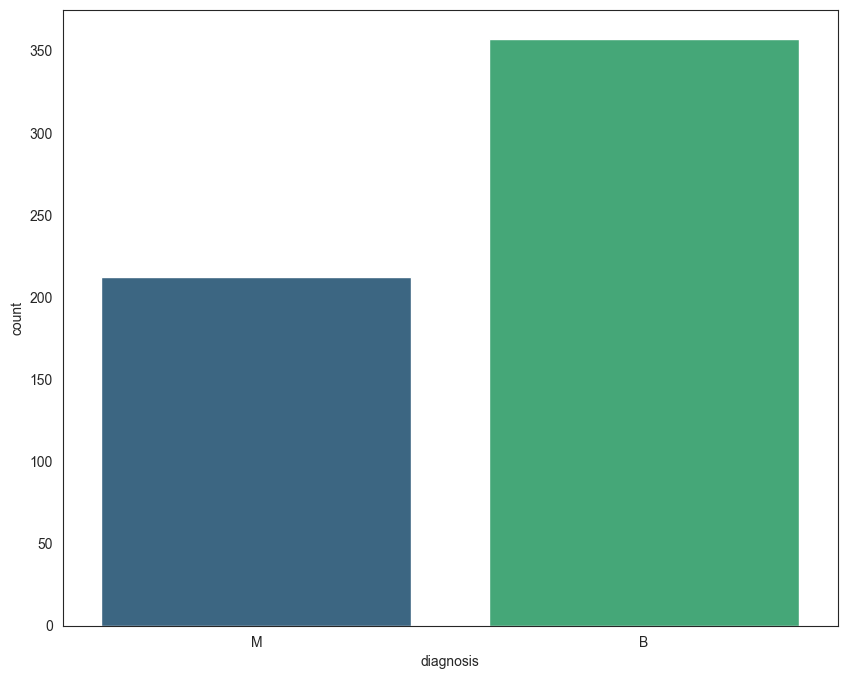

In [19]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(x='diagnosis', data=df, label='Count', palette="viridis", hue='diagnosis', legend=False)

Visualizing Data Distribution with Histograms

Histograms serve as a prevalent tool for visualizing numerical variables. They operate by grouping the variable's values into distinct intervals or bins, akin to a bar graph. Each bin corresponds to a range of values, and the height of the bar in each bin represents the count of observations within that range.

Key insights obtained from histograms:

Distribution Shape: The shape of the bins offers insights into the nature of the variable's distribution, whether it follows a Gaussian pattern, exhibits skewness, or displays characteristics of an exponential distribution.

Outlier Detection: Histograms assist in identifying potential outliers within the data, providing a visual representation of data points that deviate from the general trend.

Utilizing histograms enhances the understanding of the distributional characteristics of each attribute, aiding in subsequent analysis and decision-making processes.

In [20]:
df.groupby(df.diagnosis).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Visualise distribution of data via histograms

Histograms are frequently employed to visually represent numerical variables. They resemble bar graphs, but instead of displaying individual data points, histograms organize the values of the variable into distinct intervals or bins. Each bin corresponds to a range of values, and the height of the bar in each bin indicates the count of observations falling within that range. Analyzing the distribution of these bins provides insights into the nature of the variable's distribution—whether it follows a Gaussian pattern, exhibits skewness, or displays characteristics of an exponential distribution. Additionally, histograms aid in identifying potential outliers within the data.

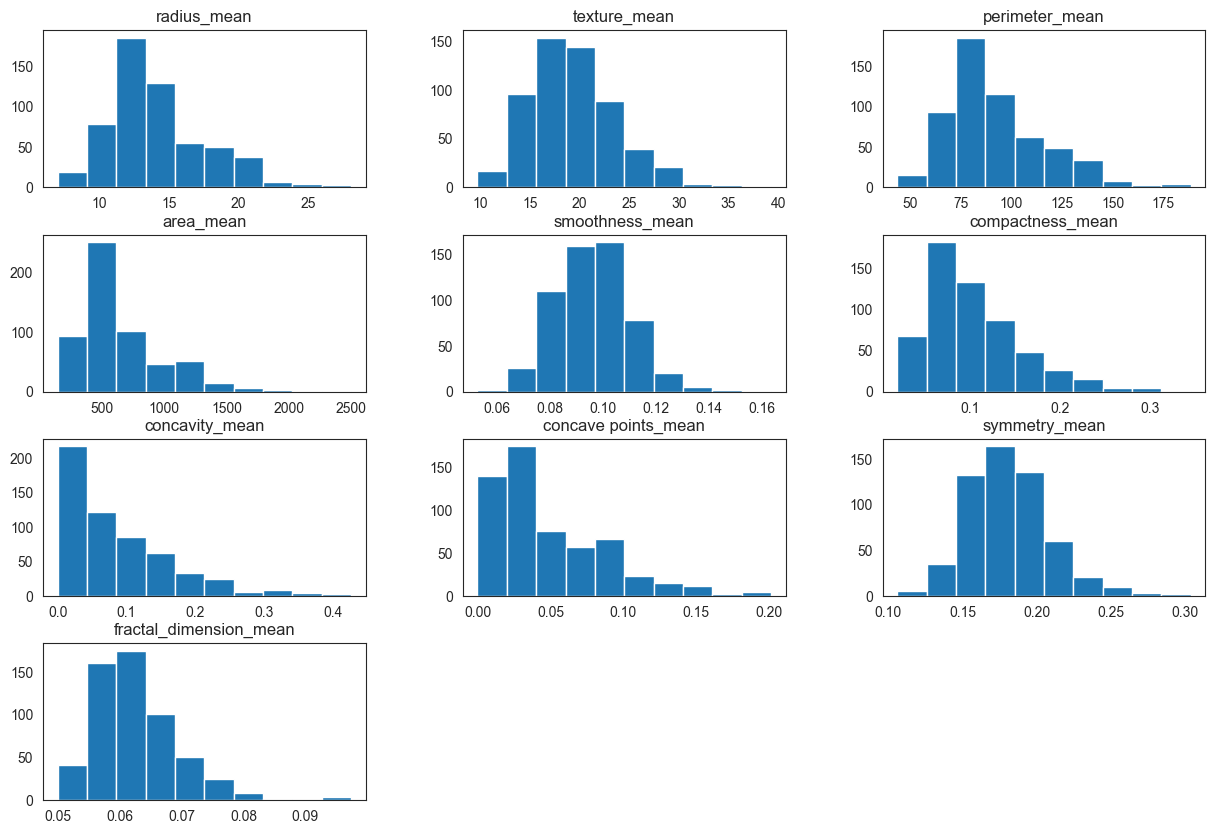

In [21]:
# Extract relevant columns
df_id_diag = df[['id', 'diagnosis']]
df_diag = df[['diagnosis']]

# Use filter to separate columns based on suffix
df_mean = df.filter(regex='_mean$', axis=1)
df_se = df.filter(regex='_se$', axis=1)
df_worst = df.filter(regex='_worst$', axis=1)
#Plot histograms of CUT1 variables
hist_mean=df_mean.hist(bins=10, figsize=(15, 10),grid=False,)

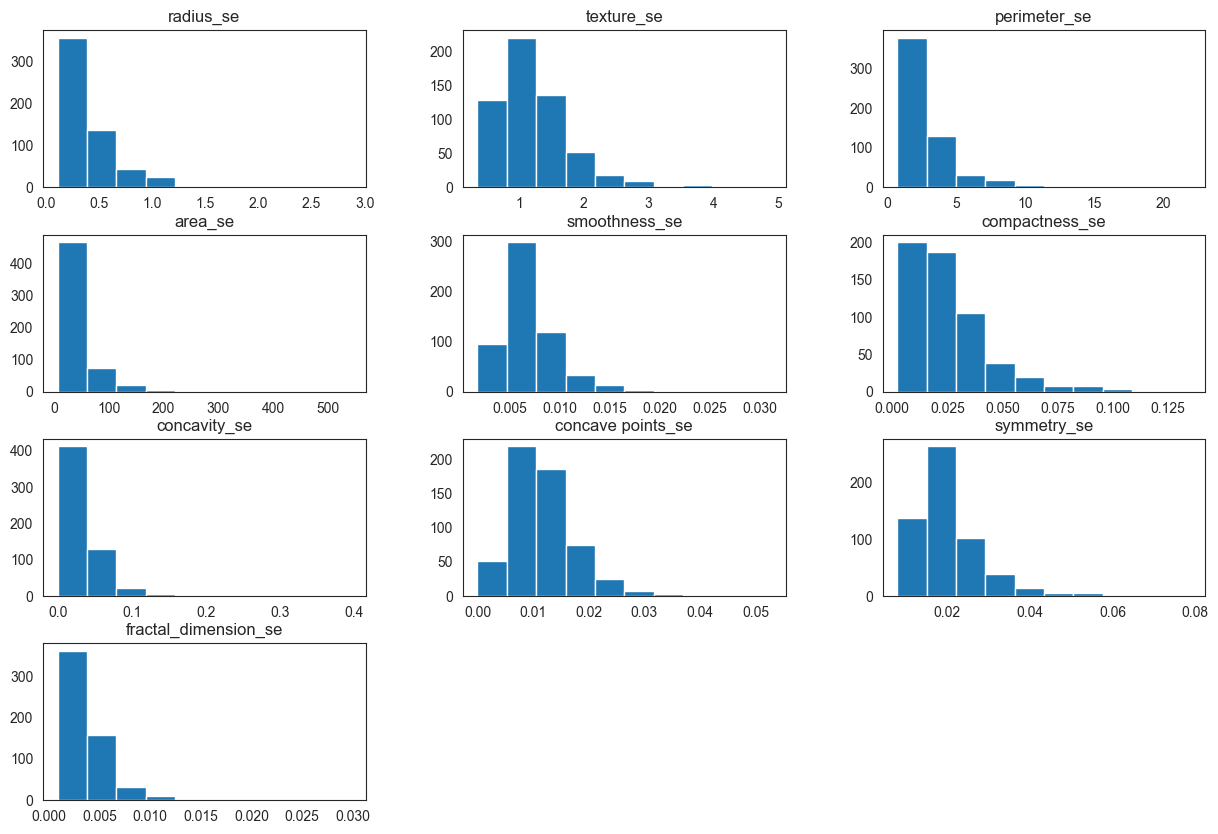

In [22]:
#Plot histograms of _se variables
hist_se=df_se.hist(bins=10, figsize=(15, 10),grid=False,)

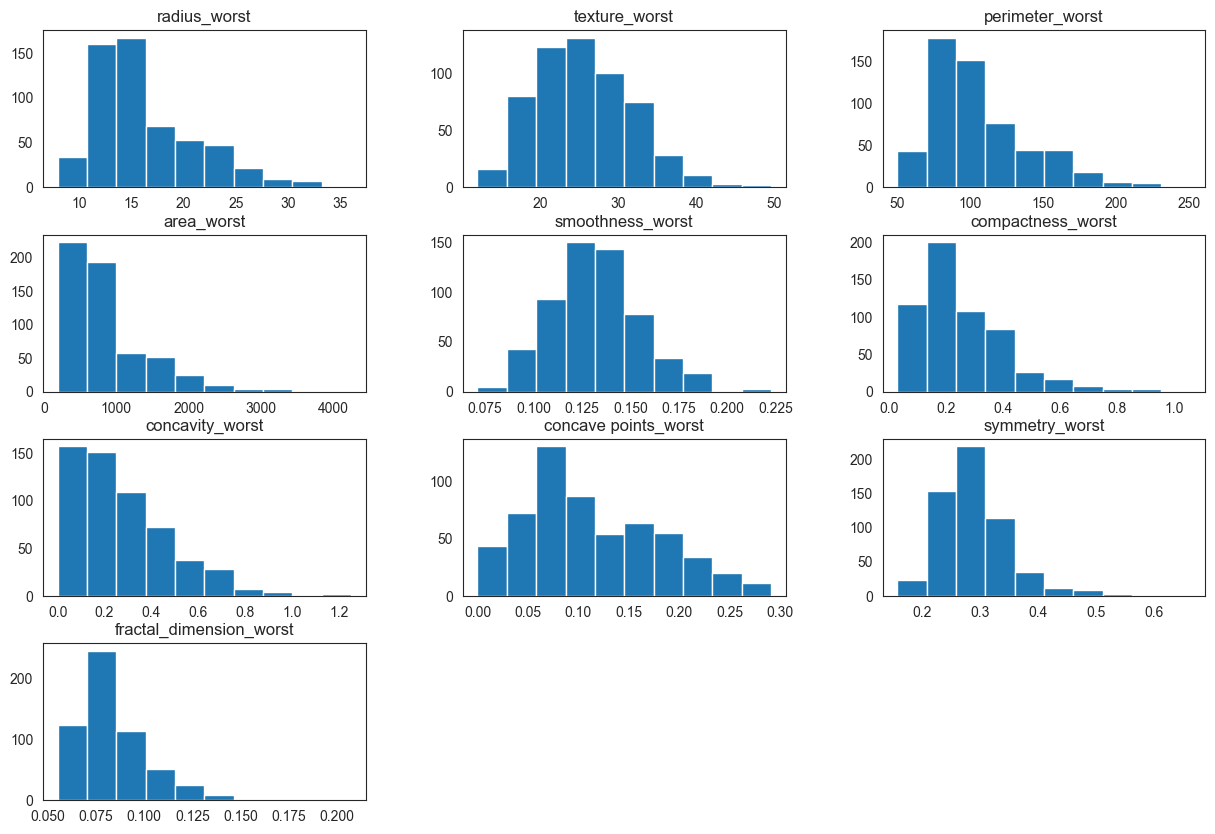

In [23]:
#Plot histograms of _worst variables
hist_worst=df_worst.hist(bins=10, figsize=(15, 10),grid=False,)

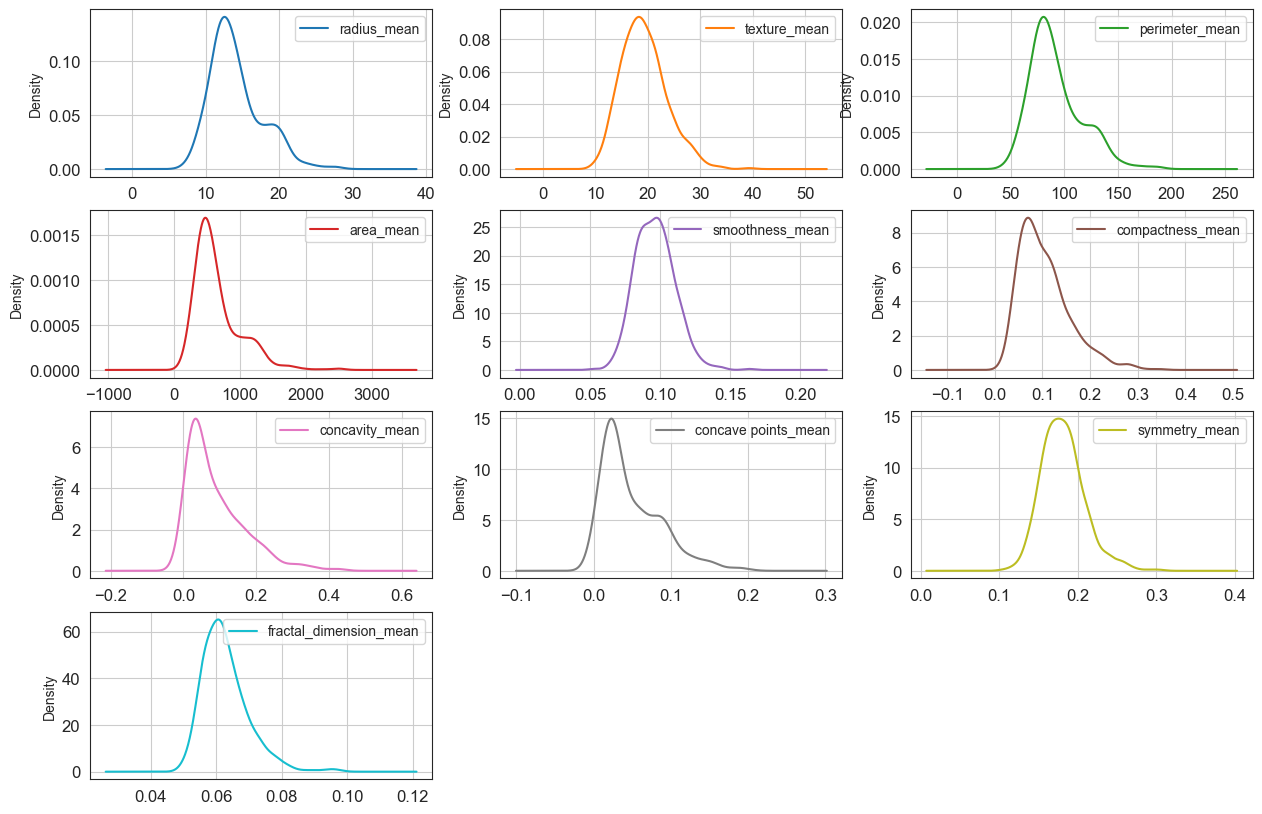

In [24]:
#Density Plots
plt = df_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                     sharey=False, fontsize=12, figsize=(15,10), grid=True)

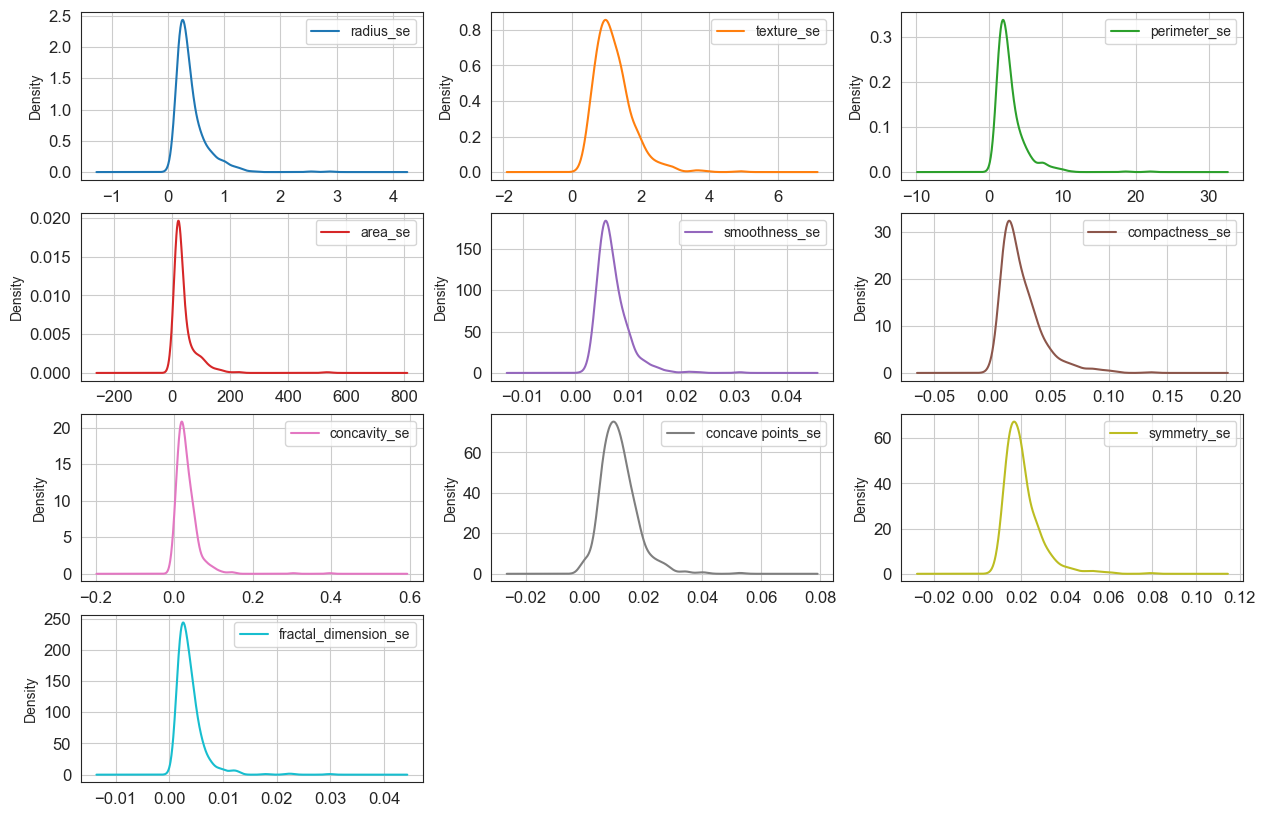

In [25]:
#Density Plots
plt = df_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                    sharey=False, fontsize=12, figsize=(15,10), grid=True)

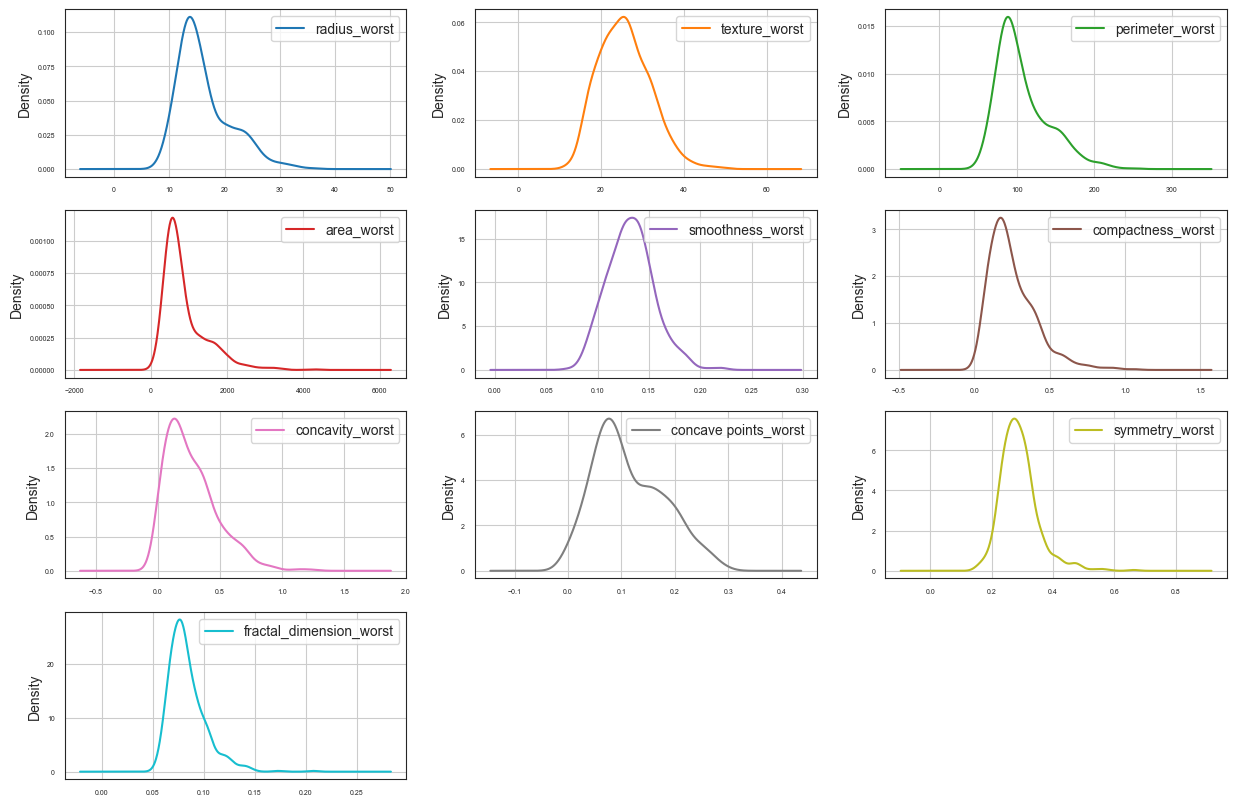

In [26]:
#Density Plots
plt = df_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,
                    fontsize=5, figsize=(15,10), grid=True)

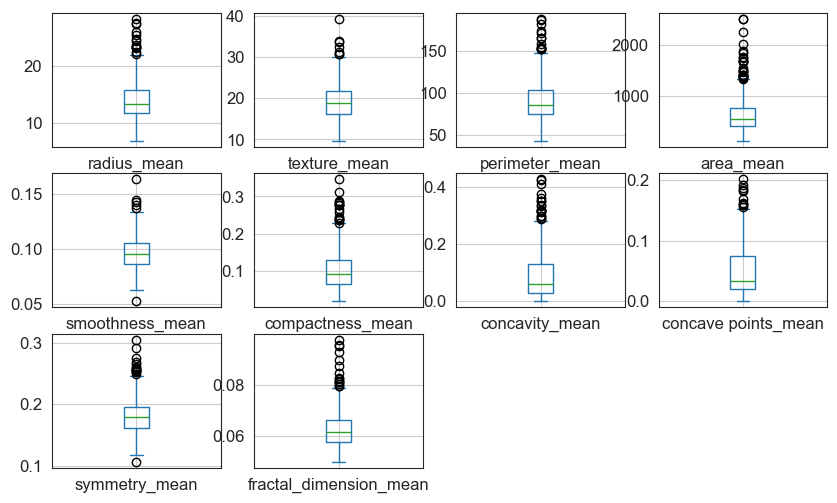

In [27]:
# box and whisker plots
plt=df_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=12, grid=True)

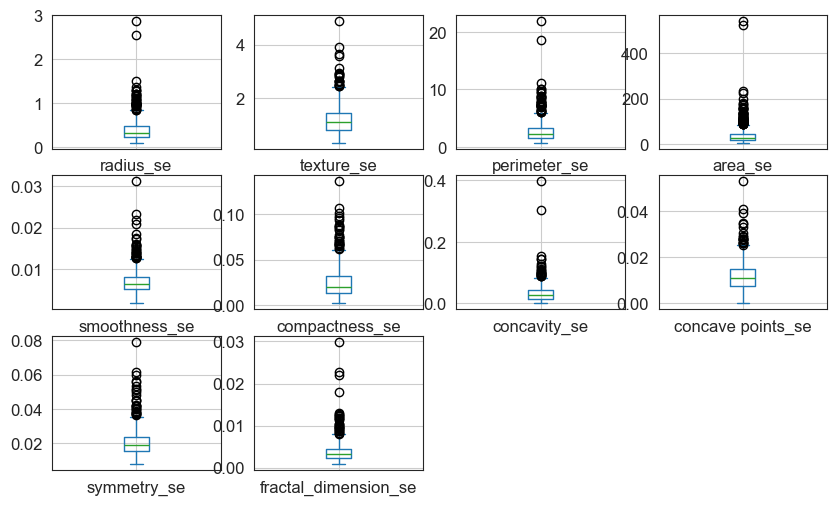

In [28]:
# box and whisker plots
plt=df_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
               fontsize=12, grid=True)

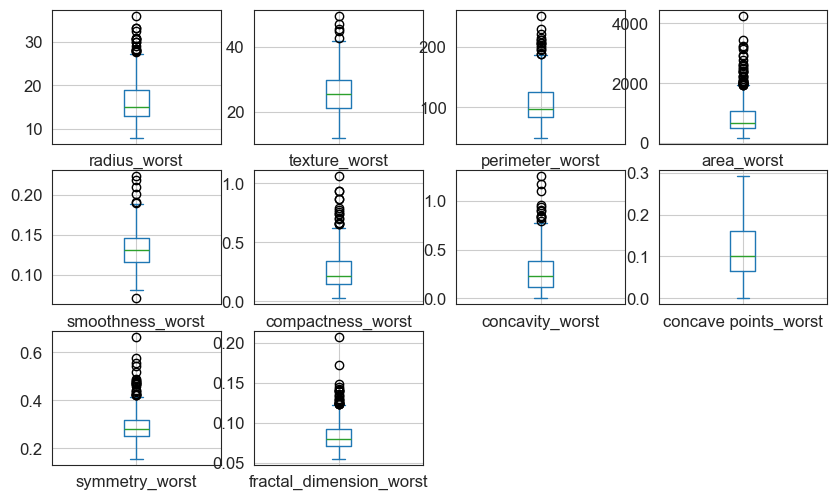

In [29]:
# box and whisker plots
plt=df_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                  fontsize=12, grid=True)

Correlation Analysis

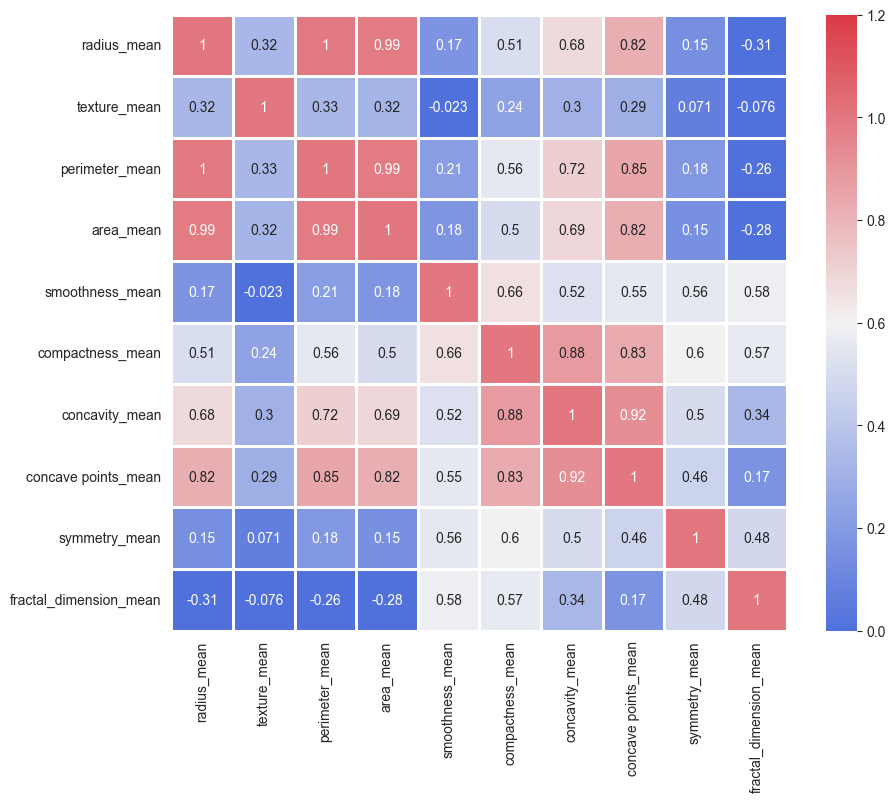

In [47]:
# Load your data
df = pd.read_csv('/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/data/processed /data_clean.csv', index_col=0)  # Assuming 'id' is the first column

# Encode the 'diagnosis' column
df['diagnosis'] = df['diagnosis']

# Compute the correlation matrix
corr = df_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,vmin=0, vmax=1.2, square=True, cmap=cmap, annot=True, fmt='.2g', linewidths=2)

plt.show()

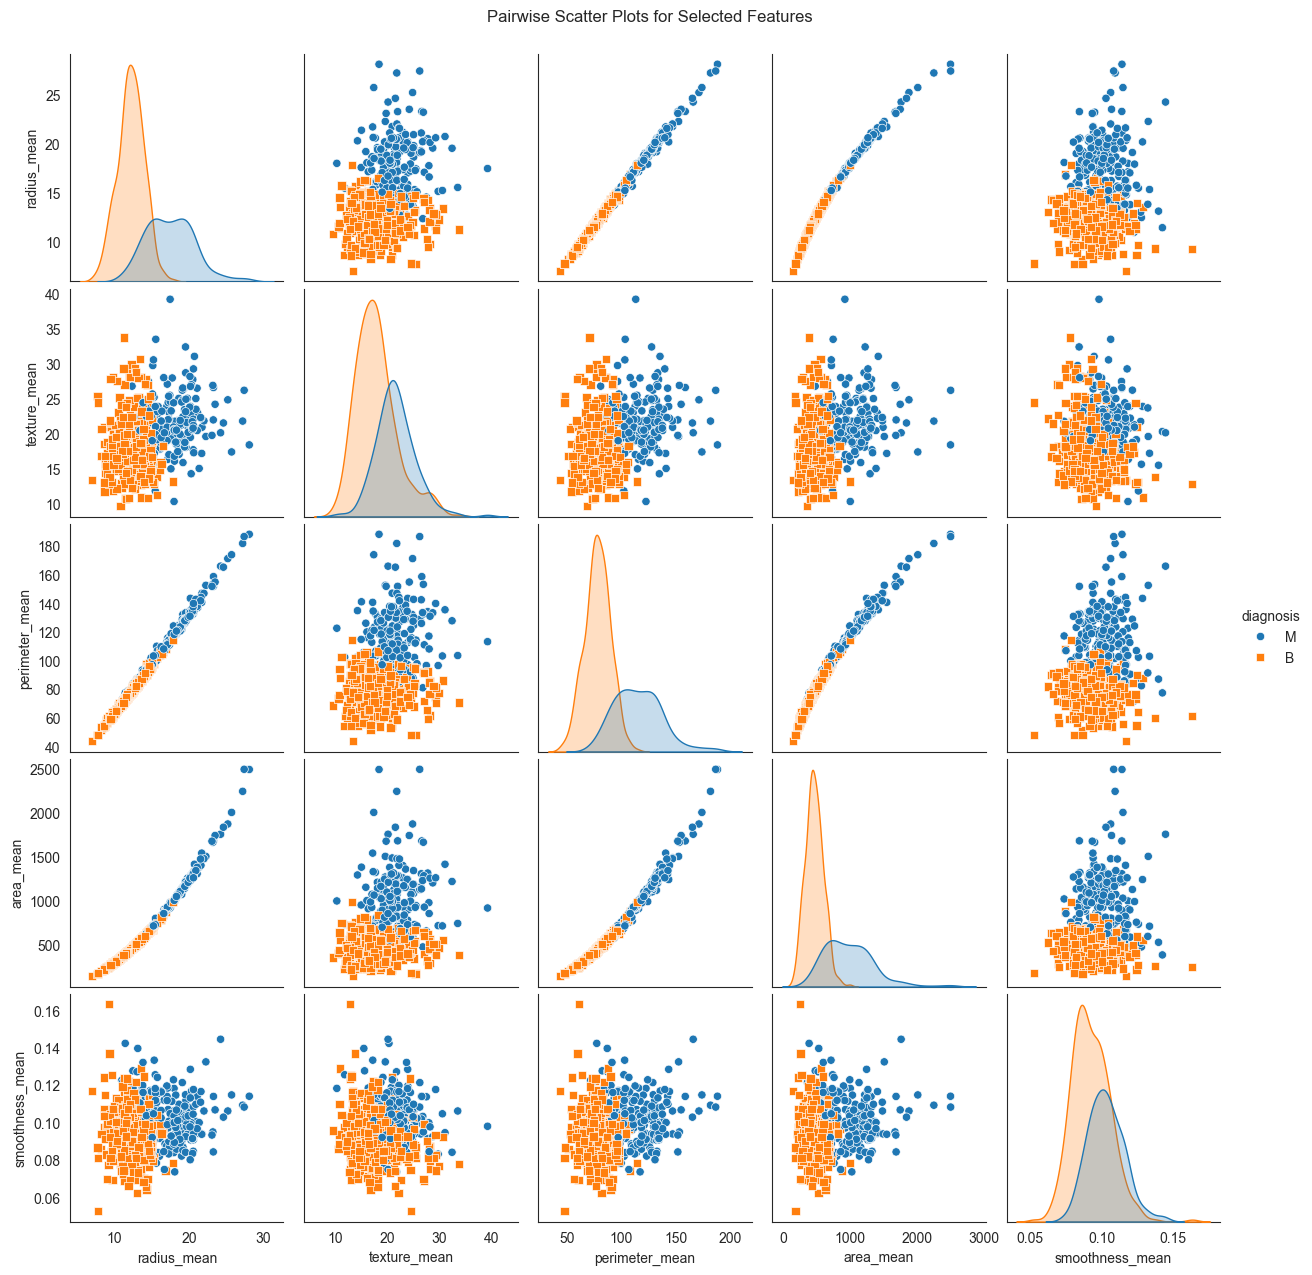

In [46]:
df = pd.read_csv('/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/data/processed /data_clean.csv', index_col=0)

# Encode the 'diagnosis' column
df['diagnosis'] = df['diagnosis']

# Specify the columns for the pairplot
selected_features = ['radius_mean', 'texture_mean','perimeter_mean', 'area_mean','smoothness_mean']

# Create a pairplot
sns.pairplot(df, hue='diagnosis', vars=selected_features, markers=["o", "s"])
plt.suptitle('Pairwise Scatter Plots for Selected Features', y=1.02)
plt.show()

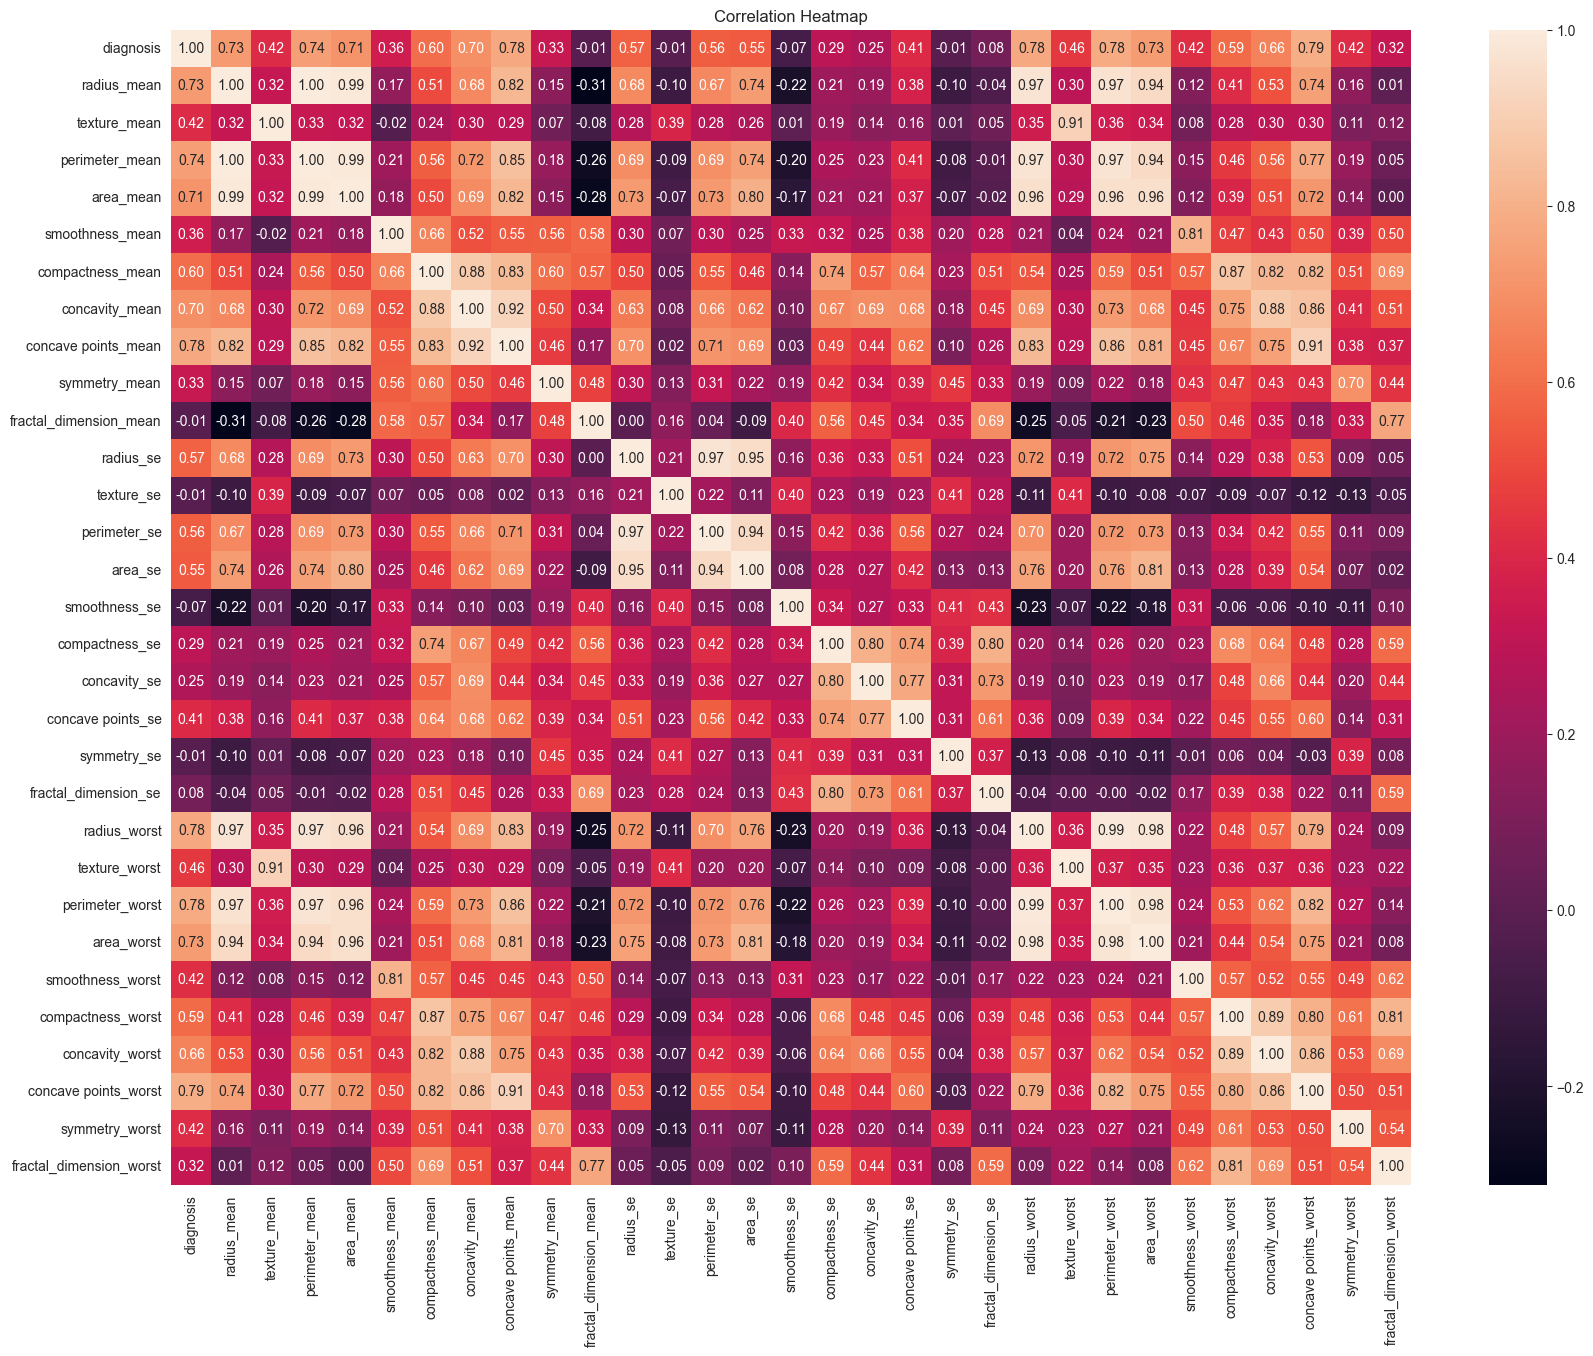

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = df.select_dtypes(include='number')
# Correlation heatmap of numeric features
plt.figure(figsize=(20, 15))
correlation = numeric_columns.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Splitting the dataset

In [48]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis'].map(lambda x: 1 if x == 'M' else 0)

In [49]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [50]:
y

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
           ..
926424      1
926682      1
926954      1
927241      1
92751       0
Name: diagnosis, Length: 569, dtype: int64

Train Test Split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [52]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
855138,13.48,20.82,88.40,559.2,0.10160,0.12550,0.106300,0.05439,0.1720,0.06419,...,15.53,26.02,107.30,740.4,0.1610,0.42250,0.50300,0.22580,0.2807,0.10710
894604,10.25,16.18,66.52,324.2,0.10610,0.11110,0.067260,0.03965,0.1743,0.07279,...,11.28,20.61,71.53,390.4,0.1402,0.23600,0.18980,0.09744,0.2608,0.09702
912193,12.16,18.03,78.29,455.3,0.09087,0.07838,0.029160,0.01527,0.1464,0.06284,...,13.34,27.87,88.83,547.4,0.1208,0.22790,0.16200,0.05690,0.2406,0.07729
854253,16.74,21.59,110.10,869.5,0.09610,0.13360,0.134800,0.06018,0.1896,0.05656,...,20.01,29.02,133.50,1229.0,0.1563,0.38350,0.54090,0.18130,0.4863,0.08633
877989,17.54,19.32,115.10,951.6,0.08968,0.11980,0.103600,0.07488,0.1506,0.05491,...,20.42,25.84,139.50,1239.0,0.1381,0.34200,0.35080,0.19390,0.2928,0.07867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9011495,12.21,18.02,78.31,458.4,0.09231,0.07175,0.043920,0.02027,0.1695,0.05916,...,14.29,24.04,93.85,624.6,0.1368,0.21700,0.24130,0.08829,0.3218,0.07470
902727,13.28,13.72,85.79,541.8,0.08363,0.08575,0.050770,0.02864,0.1617,0.05594,...,14.24,17.37,96.59,623.7,0.1166,0.26850,0.28660,0.09173,0.2736,0.07320
903516,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.281000,0.15620,0.2162,0.06606,...,26.23,28.74,172.00,2081.0,0.1502,0.57170,0.70530,0.24220,0.3828,0.10070


In [53]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
86135502,19.020,24.59,122.00,1076.0,0.09029,0.12060,0.146800,0.08271,0.1953,0.05629,...,24.56,30.41,152.90,1623.0,0.1249,0.32060,0.57550,0.19560,0.3956,0.09288
866674,19.790,25.12,130.40,1192.0,0.10150,0.15890,0.254500,0.11490,0.2202,0.06113,...,22.63,33.58,148.70,1589.0,0.1275,0.38610,0.56730,0.17320,0.3305,0.08465
8510824,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.02076,0.1815,0.06905,...,10.23,15.66,65.13,314.9,0.1324,0.11480,0.08867,0.06227,0.2450,0.07773
84799002,14.540,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.07364,0.2303,0.07077,...,17.46,37.13,124.10,943.2,0.1678,0.65770,0.70260,0.17120,0.4218,0.13410
906290,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,12.36,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881861,12.830,22.33,85.26,503.2,0.10880,0.17990,0.169500,0.06861,0.2123,0.07254,...,15.20,30.15,105.30,706.0,0.1777,0.53430,0.62820,0.19770,0.3407,0.12430
865468,13.370,16.39,86.10,553.5,0.07115,0.07325,0.080920,0.02800,0.1422,0.05823,...,14.26,22.75,91.99,632.1,0.1025,0.25310,0.33080,0.08978,0.2048,0.07628
884448,13.200,17.43,84.13,541.6,0.07215,0.04524,0.043360,0.01105,0.1487,0.05635,...,13.94,27.82,88.28,602.0,0.1101,0.15080,0.22980,0.04970,0.2767,0.07198


In [54]:
y_train

id
855138     1
894604     0
912193     0
854253     1
877989     1
          ..
9011495    0
902727     0
903516     1
873586     0
891923     0
Name: diagnosis, Length: 455, dtype: int64

Scaling  data

In [56]:
scaler = StandardScaler()

In [57]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [58]:
X_train

array([[-0.1986732 ,  0.33461497, -0.1632972 , ...,  1.65413837,
        -0.166842  ,  1.28581009],
       [-1.1002692 , -0.72971613, -1.04705915, ..., -0.27323533,
        -0.47858406,  0.73230789],
       [-0.56712729, -0.30535998, -0.57165338, ..., -0.88195868,
        -0.79502576, -0.35108481],
       ...,
       [ 2.07066907,  0.66951226,  2.09861638, ...,  1.90039054,
         1.43259844,  0.93438012],
       [-0.38569156, -1.44538705, -0.45047944, ..., -1.13722008,
        -1.77098207, -0.57621964],
       [-0.11772495, -1.39721689, -0.17703025, ..., -0.86514146,
        -0.14177731, -0.86450203]])

In [61]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

Model

In [47]:
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [48]:
array = df.values
X = array[:,1:31]
y = array[:,0]
# Print each row of X in a new line
for row in X:
    print(row)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02]
[1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
 1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
 6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
 2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
 3.613e-01 8.758e-02]
[1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
 1.052e-01 

In [49]:
le = LabelEncoder()
y = le.fit_transform(y)
# Print the transformed labels
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [50]:
##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [77]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

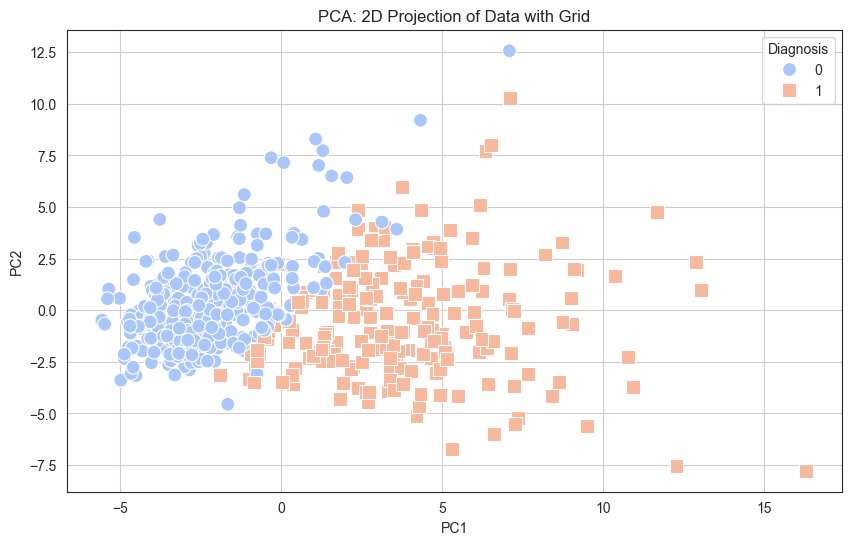

In [81]:
import matplotlib.pyplot as plt
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_standardized)

# Create a DataFrame with the principal components and the target variable
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = y

# Visualize the data in 2D using PCA components with grid
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=pca_df, palette='coolwarm', style='Diagnosis', markers=['o', 's'], s=100)
plt.title('PCA: 2D Projection of Data with Grid')
plt.grid(True)
plt.show()

In [83]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

[44.27 63.24]


Visualizing Explained Variance


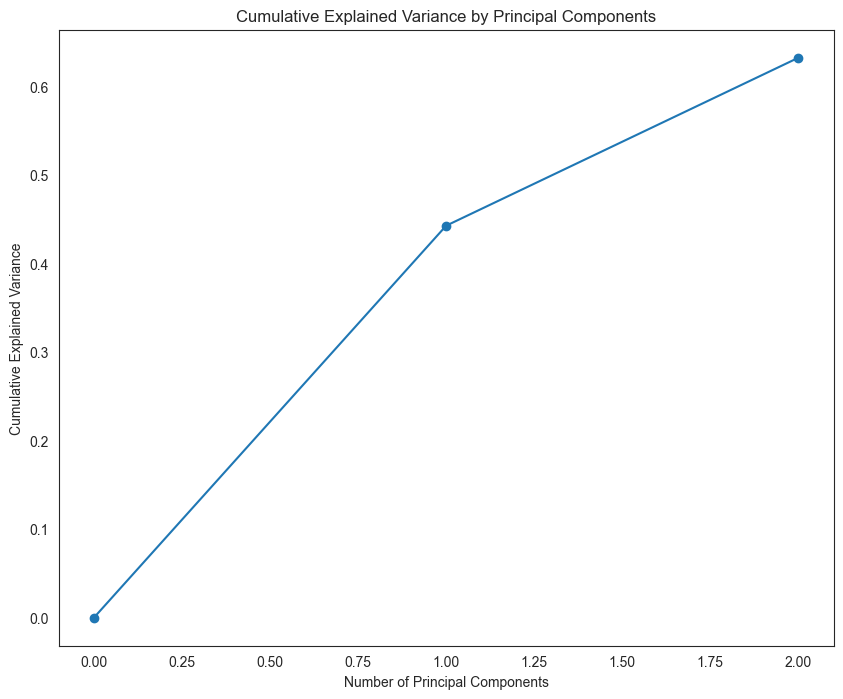

In [84]:
# Visualize explained variance by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot([0] + list(range(1, len(explained_variance_ratio) + 1)), [0] + list(cumulative_explained_variance), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

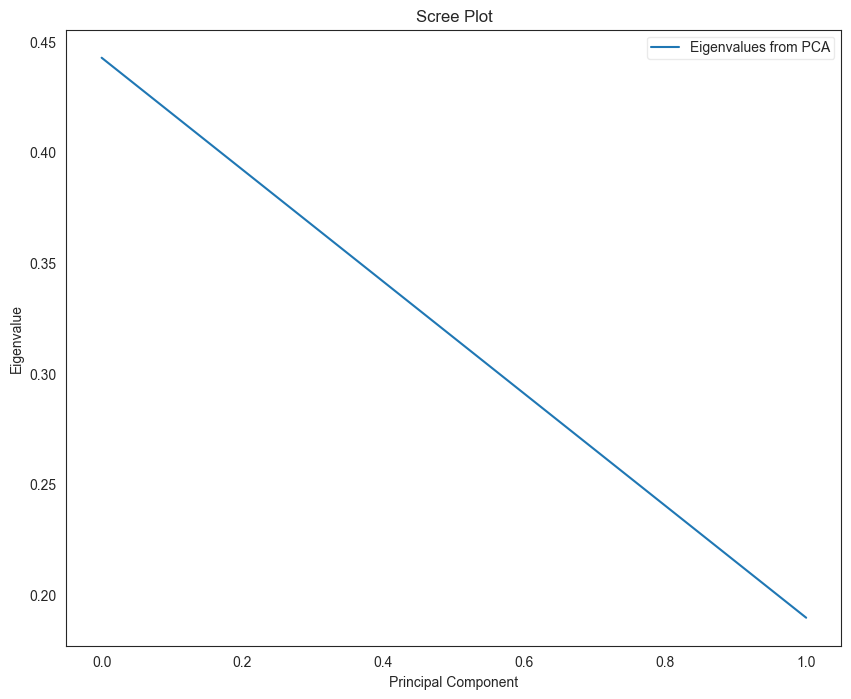

In [85]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, shadow=False, markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(state=True)
plt.show()